<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_K_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: K-Nearest Neighbour**

### **K-Nearest Neighbor Basics**

**K Nearest Neighbor(KNN)** is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. KNN algorithm used for both **classification** and **regression** problems.

We say that KNN is a non-parametric and lazy learning algorithm. **Non-parametric** means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. **Lazy algorithm** means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

* Training example in **Euclidean space**: $x\in\mathbf{R}^{d}$

* **Idea:** The value of the target function for a new query is estimated from the known value(s) of the nearest training example(s)

* Distance typically defined to be **Euclidean**:

$$
\parallel x^{(a)}-x^{(b)} \parallel_{2} = \sqrt{\sum_{j=1}^{d}(x_{j}^{(a)} - x_{j}^{(b)})^{2}}
$$

### **KNN Algorithm**

1. Load the training and test data 
2. Choose the value of K 
3. For each point in test data:
    - Find the Euclidean distance to all training data points
    - Store the Euclidean distances in a list and sort it 
    - Choose the first k points 
    - Assign a class to the test point based on the majority of classes present in the chosen points


### **Choice of K**

* $k=1$ can be unstable, particularly if the data are noisy
* Better to choose an odd number to avoid ties, e.g. $k=3$ or $k=5$
* Larger $k$ may lead to better performance. But if we set $k$ too large we may end up looking at samples that are not neighbors (are far away from the query)
* Rule of thumb is $k < \mathrm{sqrt}(n)$, where $n$ is the number of training examples
* Choose $k$ that yields the smallest error on the test data

### **Dataset Initialization**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [10]:
np.random.seed(0)

# Initial linear separable data
x_1, x_2 = np.random.rand(50, 1), np.random.rand(50, 1) + 0.75
y_1, y_2 = 3 + 3 * x_1 + np.random.rand(50, 1), 3 + 3 * x_1 + np.random.rand(50, 1) 
class_1, class_2 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1)
zeros, ones = np.zeros((50,1)), np.ones((50,1))
x = np.concatenate((class_1, class_2), axis=0)
y = np.concatenate((zeros, ones), axis=0)

Text(0, 0.5, 'X2')

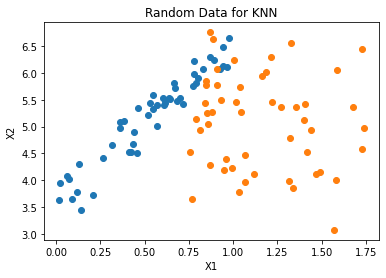

In [11]:
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1) 
ax.scatter(x_2,y_2) 
ax.set_title('Random Data for KNN')
ax.set_xlabel('X1') 
ax.set_ylabel('X2')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### **Implementing K-Nearest Neighbour from scratch**

In [13]:
class KNearestNeighbour():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def euclidean(self, x_test, x_train):
        return np.sqrt(np.sum((x_test - x_train)**2, axis=1))

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self, x_test):
        pred = []
        for x in x_test:
            distances = self.euclidean(x, self.x_train)
            min_neighbors = sorted(range(len(distances)), key=lambda y: distances[y])[:self.n_neighbors]
            min_neighbors_y = [float(self.y_train[i]) for i in min_neighbors]
            pred.append(max(set(min_neighbors_y), key=min_neighbors_y.count))
        return np.array(pred).reshape(-1,1)
    
    def accuracy(self, y_pred, y_test):
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [14]:
k_range = range(1,20)
scores_list = []

for k in k_range:
    knn = KNearestNeighbour(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores_list.append(knn.accuracy(y_pred, y_test))

Best K: 2


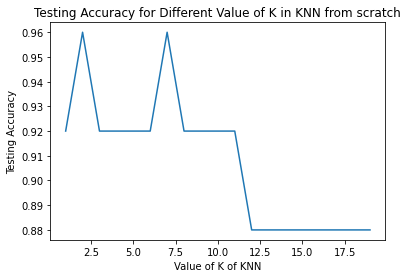

In [15]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K of KNN')
plt.ylabel('Testing Accuracy')
plt.title("Testing Accuracy for Different Value of K in KNN from scratch")
max_k = scores_list.index(max(scores_list))+1
print("Best K:", max_k)

Text(0, 0.5, 'X2')

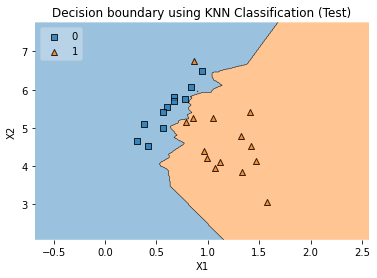

In [23]:
# Plotting the decision boundary
knn = KNearestNeighbour(n_neighbors=max_k)
knn.fit(x_train,y_train)
plot_decision_regions(x_test, y_test.ravel().astype(int), clf = knn, legend = 2)
plt.title("Decision boundary using KNN Classification (Test)")
plt.xlabel("X1")
plt.ylabel("X2")

### **Implementing K-Nearest Neighbour from sklearn**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
k_range = range(1,20)
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.ravel())
    y_pred = knn.predict(x_test)
    scores_list.append(accuracy_score(y_test,y_pred))

Best K: 2


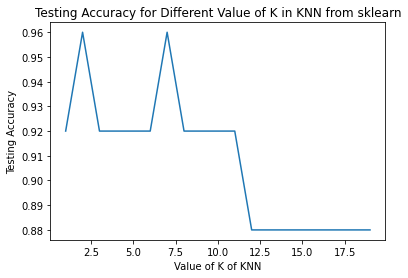

In [19]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K of KNN')
plt.ylabel('Testing Accuracy')
plt.title("Testing Accuracy for Different Value of K in KNN from sklearn")
max_k = scores_list.index(max(scores_list))+1
print("Best K:", max_k)

Text(0, 0.5, 'X2')

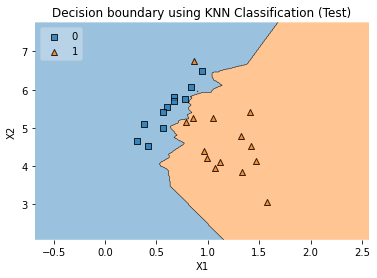

In [24]:
# Plotting the decision boundary
knn = KNeighborsClassifier(n_neighbors=max_k)
knn.fit(x_train,y_train.ravel())
plot_decision_regions(x_test, y_test.ravel().astype(int), clf = knn, legend = 2)
plt.title("Decision boundary using KNN Classification (Test)")
plt.xlabel("X1")
plt.ylabel("X2")

In [21]:
%%shell
jupyter nbconvert --to html ML_Algorithms_K_Nearest_Neighbour.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_K_Nearest_Neighbour.ipynb to html
[NbConvertApp] Writing 402613 bytes to ML_Algorithms_K_Nearest_Neighbour.html
